In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
#declare a base using automap_base
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect = True)

In [6]:
#print the classes mapped to the base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
inspector = inspect(engine)

In [9]:
#inspect the measurement tables
columns = inspector.get_columns('measurement')
for column in columns:
    print (column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#inspect the station tables
columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
engine.execute('SELECT date FROM measurement ORDER BY date desc LIMIT 1').fetchall()

[('2017-08-23',)]

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve = session.query(Measurement.date).filter(Measurement.date >= '2016-08-23').all()

In [14]:
# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
session.query(Measurement.date).filter(Measurement.date >= query_date).all()

[('2016-08-23',),
 ('2016-08-24',),
 ('2016-08-25',),
 ('2016-08-26',),
 ('2016-08-27',),
 ('2016-08-28',),
 ('2016-08-29',),
 ('2016-08-30',),
 ('2016-08-31',),
 ('2016-09-01',),
 ('2016-09-02',),
 ('2016-09-03',),
 ('2016-09-04',),
 ('2016-09-05',),
 ('2016-09-06',),
 ('2016-09-07',),
 ('2016-09-08',),
 ('2016-09-09',),
 ('2016-09-10',),
 ('2016-09-11',),
 ('2016-09-12',),
 ('2016-09-13',),
 ('2016-09-14',),
 ('2016-09-15',),
 ('2016-09-16',),
 ('2016-09-17',),
 ('2016-09-18',),
 ('2016-09-19',),
 ('2016-09-20',),
 ('2016-09-21',),
 ('2016-09-22',),
 ('2016-09-23',),
 ('2016-09-24',),
 ('2016-09-25',),
 ('2016-09-26',),
 ('2016-09-27',),
 ('2016-09-28',),
 ('2016-09-29',),
 ('2016-09-30',),
 ('2016-10-01',),
 ('2016-10-02',),
 ('2016-10-03',),
 ('2016-10-04',),
 ('2016-10-05',),
 ('2016-10-06',),
 ('2016-10-07',),
 ('2016-10-08',),
 ('2016-10-09',),
 ('2016-10-10',),
 ('2016-10-11',),
 ('2016-10-12',),
 ('2016-10-13',),
 ('2016-10-14',),
 ('2016-10-15',),
 ('2016-10-16',),
 ('2016-10

In [15]:
# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

In [16]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_data)
precipitation_df = precipitation_df.rename(columns={0:'date', 1:"precipitation"})
precipitation_df = precipitation_df.dropna()
precipitation_df

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50


In [17]:
prec_avg_df = precipitation_df.groupby(['date']).mean()

In [18]:
prec_avg_df

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [19]:
# Sort the dataframe by date
prec_avg_df.sort_index()

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


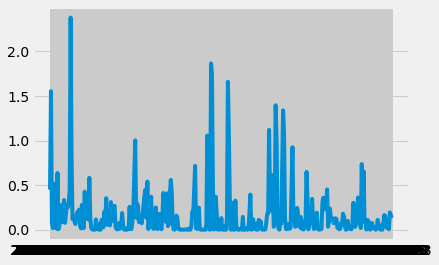

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(prec_avg_df.index.values, prec_avg_df['precipitation'])
plt.show()

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
#inspect the station tables
columns_s = inspector.get_columns('station')
for column in columns_s:
    print(column['name'],column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.name).count()
total_stations

9

In [24]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Station.station, Station.id, func.count(Station.id)).\
filter(Measurement.station == Station.station).\
group_by(Measurement.station).\
order_by(func.count(Station.id).desc()).all()

In [25]:
active_stations

[('USC00519281', 7, 2772),
 ('USC00519397', 1, 2724),
 ('USC00513117', 2, 2709),
 ('USC00519523', 6, 2669),
 ('USC00516128', 9, 2612),
 ('USC00514830', 3, 2202),
 ('USC00511918', 8, 1979),
 ('USC00517948', 4, 1372),
 ('USC00518838', 5, 511)]

In [26]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_data = session.query(Measurement.date, Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= '2016-08-23').group_by(Measurement.date).all()
most_active_df = pd.DataFrame(most_active_data)
most_active_df

,0,1
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0
...,...,...
347,2017-08-14,77.0
348,2017-08-15,77.0
349,2017-08-16,76.0
350,2017-08-17,76.0


In [28]:
most_active_df = most_active_df.rename(columns={0:'date', 1:"tobs"})
most_active_df = most_active_df.set_index('date')

(array([ 6., 10., 15., 27., 41., 58., 72., 86., 29.,  8.]),
 array([59. , 61.4, 63.8, 66.2, 68.6, 71. , 73.4, 75.8, 78.2, 80.6, 83. ]),
 <BarContainer object of 10 artists>)

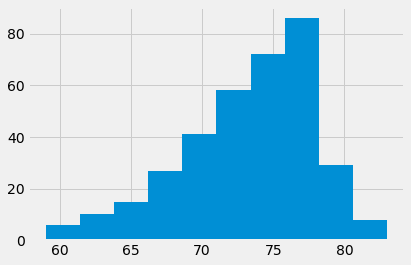

In [29]:
plt.hist(most_active_df['tobs'])

# Close session

In [30]:
# Close Session
session.close()